Using TensorFlow backend.


170500096/170498071 [==============================] - 13s 0us/step
Epoch 1/10
4000/4000 [==============================] - 14s 3ms/step - loss: 1.5710 - accuracy: 0.4237 - val_loss: 1.2652 - val_accuracy: 0.5448
Epoch 2/10
4000/4000 [==============================] - 13s 3ms/step - loss: 1.2299 - accuracy: 0.5580 - val_loss: 1.0471 - val_accuracy: 0.6336
Epoch 3/10
4000/4000 [==============================] - 13s 3ms/step - loss: 1.0995 - accuracy: 0.6056 - val_loss: 1.0031 - val_accuracy: 0.6528
Epoch 4/10
4000/4000 [==============================] - 13s 3ms/step - loss: 1.0187 - accuracy: 0.6375 - val_loss: 0.9266 - val_accuracy: 0.6814
Epoch 5/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.9681 - accuracy: 0.6557 - val_loss: 0.8431 - val_accuracy: 0.7109
Epoch 6/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.9214 - accuracy: 0.6759 - val_loss: 0.8327 - val_accuracy: 0.7184
Epoch 7/10
4000/4000 [==============================] - 13s 3m

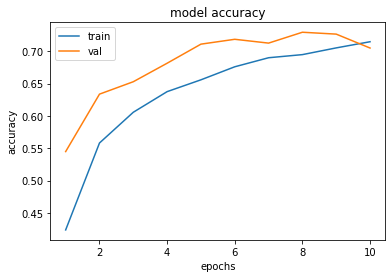

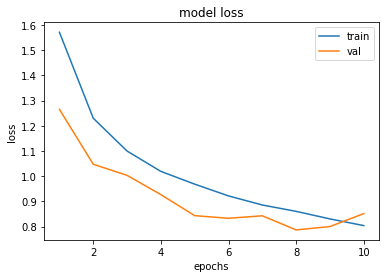

TypeError: ignored

In [ ]:
import tensorflow as tf
#tf.test.gpu_device_name()
#print(tf.__version__)
from tensorflow import keras
#print(keras.__version__)
#from keras.layers import CuDNNLSTM
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Flatten,Dense,Conv2D,MaxPool2D,Dense,Dropout
from keras.layers import CuDNNLSTM
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#print(np.shape(X_train))
X_train=X_train/255
X_test=X_test/255
classes=['airplane','automobile','bird','cat','door','dog','frog','horse','ship','truck']

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=[32,32,3],activation=tf.nn.relu))
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))
model.add(Conv2D(64,(3,3),padding='same',activation=tf.nn.relu))
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))
model.add(Conv2D(64,(3,3),padding='same',activation=tf.nn.relu))
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=10,verbose=1,validation_split=0.2)
y_pred=model.predict_classes(X_test)
print(y_pred)
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
y_pred=model.predict_classes(X_test)
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(12,12),class_names=classes)



